In [ ]:
#축구선수 이적료 모델 예측 예제
!pip install gdown
!gdown --id 1_ly6JpTlUL-5d7TO05ciPl67jca7UuFL

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_ly6JpTlUL-5d7TO05ciPl67jca7UuFL
To: /content/top5_leagues_player.csv
100% 418k/418k [00:00<00:00, 20.0MB/s]


# 데이터전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns

In [ ]:
players = pd.read_csv("top5_leagues_player.csv") # 데이터로드

In [ ]:
players.head() #데이터 확인

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,2607,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,Attack - Centre-Forward,28,right,AC Ajaccio,2023-06-30,2023-01-31,FS Management,NaN,Other
2608,2608,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,Attack - Centre-Forward,7,right,AC Ajaccio,2023-06-30,2019-07-01,N.Agency,NaN,Other
2609,2609,Moussa Soumano,NaN,17,NaN,France Mali,NaN,0.90,0.90,Attack - Centre-Forward,34,NaN,AC Ajaccio,2026-06-30,2023-01-01,NaN,NaN,Other
2610,2610,Romain Hamouma,NaN,36,1.79,France Algeria,Montbéliard,0.60,7.00,Attack - Centre-Forward,17,right,AC Ajaccio,2023-06-30,2022-07-01,Gallea Gestion S.A,NaN,Other


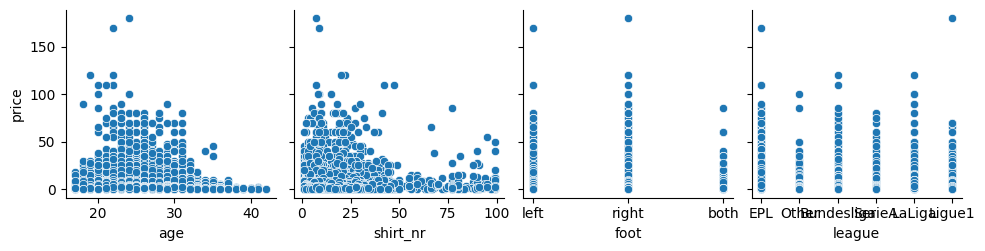

In [ ]:
sns.pairplot(data=players, y_vars="price", x_vars = ['age', 'shirt_nr', 'foot', 'league']) # Pairplot 시각화

In [ ]:
outlier = players[(players['age']>35) | (players['shirt_nr']>50)].index # Outlier 제거 boolen indexing 을통한
new_players = players.drop(outlier)

In [ ]:
# 'age' 열에서 35 이상인 값이 있는지 확인
is_over_35 = new_players['age'] > 35 
# 결과 출력 false면 정상제거된것
print(any(is_over_35))

False


<ipython-input-15-c6579255483d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_players.corr(), annot=True, cmap='coolwarm')


<Axes: >

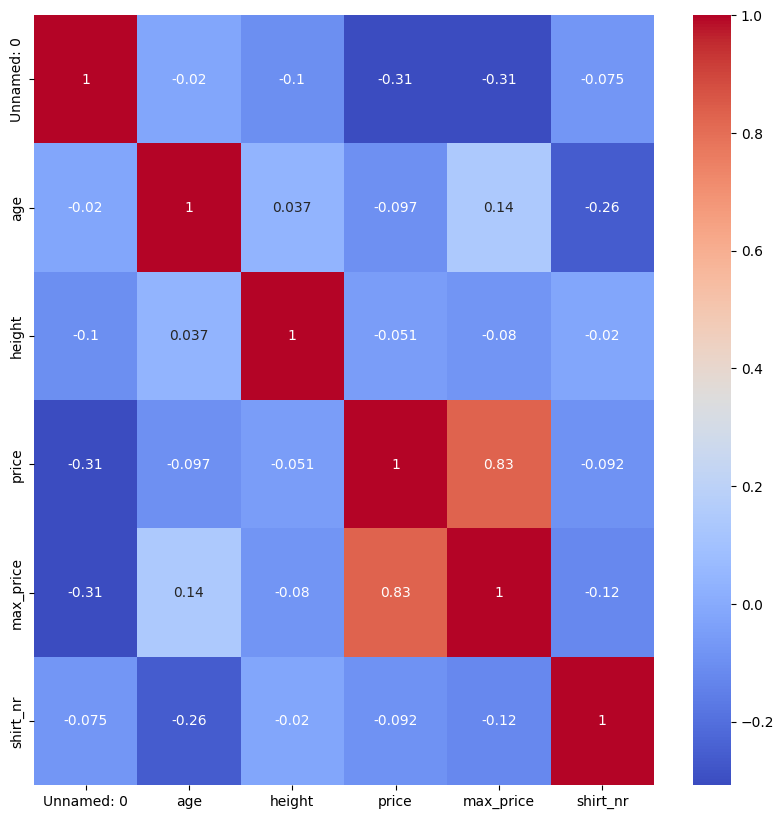

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_players.corr(), annot=True, cmap='Orange') # 상관계수 확인

In [ ]:
# 'Unnamed: 0', 'name', 'full_name' 불필요 컬럼 제거
clean_players = new_players.drop(["Unnamed: 0", "name", "full_name"], axis=1) 

In [ ]:
# NaN 값 제거
clean_players.dropna(inplace=True)

## labelencoder

In [ ]:
#방법1
from sklearn.preprocessing import LabelEncoder
label_players = clean_players.copy()

cols= ['nationality', 'place_of_birth', 'position', 'outfitter', 'club', 'player_agent', 'foot', 'joined_club']
le = LabelEncoder()

for col in cols:
    label_players[col] = le.fit_transform(label_players[col])

label_players.head()

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,29,1.88,26,403,45.0,70.0,7,31,1,55,2026-06-30,52,124,6,EPL
3,26,1.87,171,14,75.0,75.0,4,3,2,55,2027-06-30,171,124,5,EPL
4,28,1.80,155,153,35.0,40.0,4,6,1,55,2025-06-30,143,330,5,EPL
5,28,1.88,57,50,30.0,60.0,4,5,2,55,2026-06-30,46,330,5,EPL
7,27,1.88,213,591,30.0,40.0,4,25,2,55,2027-06-30,290,142,5,EPL


In [ ]:
#방법2
from sklearn.preprocessing import LabelEncoder
label_players = clean_players.copy()

# cols= ['nationality', 'place_of_birth', 'position', 'outfitter', 'club', 'player_agent', 'foot', 'joined_club']
le = LabelEncoder()

label_players['nationality'] = le.fit_transform(label_players['nationality'])
label_players['position'] = le.fit_transform(label_players['position'])
label_players['outfitter'] = le.fit_transform(label_players['outfitter'])

label_players.head()

# 원핫벡터

In [ ]:

players_preset = pd.get_dummies(label_players, drop_first=True, columns=["contract_expires","league"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 2598
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          826 non-null    int64  
 1   height                       826 non-null    float64
 2   nationality                  826 non-null    int64  
 3   place_of_birth               826 non-null    int64  
 4   price                        826 non-null    float64
 5   max_price                    826 non-null    float64
 6   position                     826 non-null    int64  
 7   shirt_nr                     826 non-null    int64  
 8   foot                         826 non-null    int64  
 9   club                         826 non-null    int64  
 10  joined_club                  826 non-null    int64  
 11  player_agent                 826 non-null    int64  
 12  outfitter                    826 non-null    int64  
 13  contract_expires_20

In [ ]:
players_preset

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,...,contract_expires_2026-06-30,contract_expires_2027-06-30,contract_expires_2028-06-30,contract_expires_2029-06-30,contract_expires_2031-06-30,league_EPL,league_LaLiga,league_Ligue1,league_Other,league_SerieA
0,29,1.88,26,403,45.0,70.0,7,31,1,55,...,1,0,0,0,0,1,0,0,0,0
3,26,1.87,171,14,75.0,75.0,4,3,2,55,...,0,1,0,0,0,1,0,0,0,0
4,28,1.80,155,153,35.0,40.0,4,6,1,55,...,0,0,0,0,0,1,0,0,0,0
5,28,1.88,57,50,30.0,60.0,4,5,2,55,...,1,0,0,0,0,1,0,0,0,0
7,27,1.88,213,591,30.0,40.0,4,25,2,55,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,26,1.89,14,464,1.8,1.8,4,5,2,26,...,0,0,0,0,0,0,0,0,1,0
2571,34,1.87,74,576,1.0,16.0,10,12,2,26,...,0,0,0,0,0,0,0,0,1,0
2580,27,1.89,187,392,2.0,2.0,0,9,2,26,...,0,0,0,0,0,0,0,0,1,0
2590,26,1.78,39,525,1.5,1.5,5,3,1,3,...,0,0,0,0,0,0,0,0,1,0


# 데이터분리 train test split

In [ ]:
from sklearn.model_selection import train_test_split

y = players_preset['price']
X = players_preset.drop("price", axis=1)

X_train, X_valid, y_train,y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


# standard scaler

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# RandomForest

In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=30, max_depth=9, random_state=42, min_samples_leaf=2, min_samples_split=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=30, random_state=42)

# mae, mse 성능지표 출력

In [ ]:
#여기에 답안을 입력하세요.
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_pred = rf_model.predict(X_valid)

rfr_mae = mean_absolute_error(y_valid, y_pred)
rfr_mse = mean_squared_error(y_valid, y_pred)
print(rfr_mae, rfr_mse)

2.581841358581831 19.370152794089545


# sequential model 딥러닝

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

estopping = EarlyStopping(monitor='val_loss')
mcheckpoint = ModelCheckpoint(monitor='val_loss', filepath='AI_best_model.h5', save_best_only=True)

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data = (X_valid_scaled, y_valid), callbacks=[estopping,mcheckpoint])

Epoch 1/100
21/21 [==============================] - 2s 20ms/step - loss: 661.3312 - val_loss: 688.6872
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 609.6210 - val_loss: 603.3012
Epoch 3/100
21/21 [==============================] - 0s 9ms/step - loss: 476.8832 - val_loss: 431.6235
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 306.2101 - val_loss: 383.1044
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 272.4588 - val_loss: 306.3836
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 225.1738 - val_loss: 263.1741
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 200.5531 - val_loss: 234.4167
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 160.6131 - val_loss: 207.7016
Epoch 9/100
21/21 [==============================] - 0s 7ms/step - loss: 157.7142 - val_loss: 182.0276
Epoch 10/100
21/21 [==============================] - 0s 7ms/step - los

# 딥러닝 검증

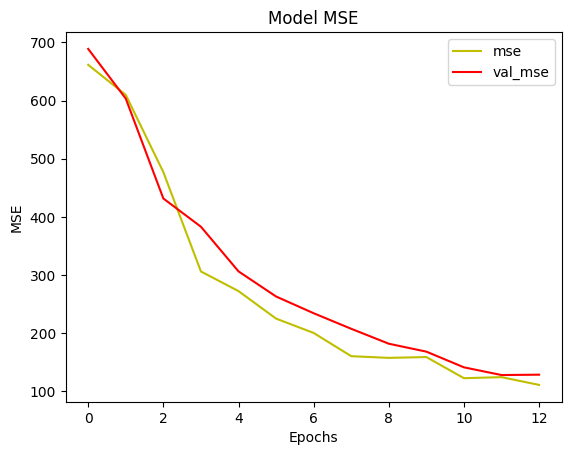

In [ ]:
plt.plot(history.history['loss'], 'y', label = 'mse')
plt.plot(history.history['val_loss'], 'r', label = 'val_mse')
plt.title("Model MSE")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()